https://www.datacamp.com/community/tutorials/deep-learning-python

In [59]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
figsize(12.5, 4)
colors = ['#348ABD', '#A60628']

In [3]:
white=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
red=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Data Exploration

In [4]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [8]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1184,6.7,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5
700,10.6,1.02,0.43,2.9,0.076,26.0,88.0,0.99840,3.08,0.57,10.1,6
679,10.8,0.26,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5
1412,8.2,0.24,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9,6
371,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6


# Visualizing The Data

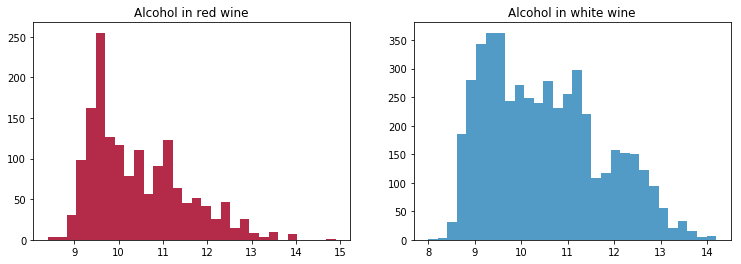

In [10]:
ax = plt.subplot(121)
plt.hist(
    red['alcohol'], 
    histtype='stepfilled', 
    bins=30, 
    alpha=.85, 
    color=colors[1]
)
plt.title('Alcohol in red wine')

ax = plt.subplot(122)
plt.hist(
    white['alcohol'], 
    histtype='stepfilled', 
    bins=30, 
    alpha=.85, 
    color=colors[0]
)
_ = plt.title('Alcohol in white wine')

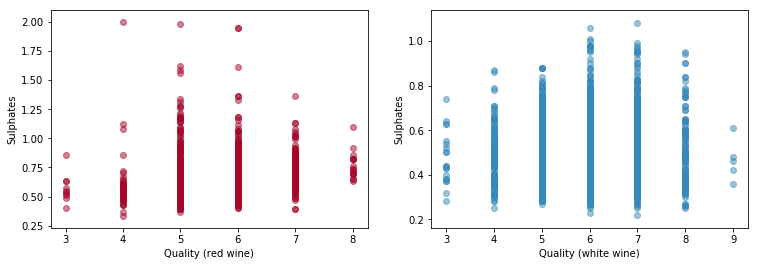

In [11]:
ax = plt.subplot(121)
plt.scatter(red['quality'], red['sulphates'], alpha=.5, color=colors[1])
plt.xlabel('Quality (red wine)')
plt.ylabel('Sulphates')
ax = plt.subplot(122)
plt.scatter(white['quality'], white['sulphates'], alpha=.5, color=colors[0])
plt.xlabel('Quality (white wine)')
_ = plt.ylabel('Sulphates')

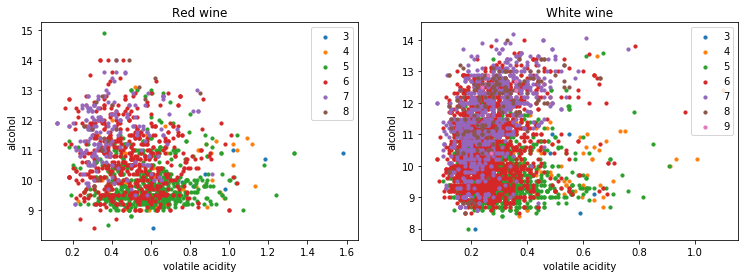

In [12]:
ax = plt.subplot(121)
for quality in range(1, 10):
    subset = red[red.quality == quality]
    if len(subset):
        plt.scatter(subset['volatile acidity'], subset['alcohol'], label=quality, s=10)
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.title('Red wine')
plt.legend(loc='best')

ax = plt.subplot(122)
for quality in range(1, 10):
    subset = white[white.quality == quality]
    if len(subset):
        plt.scatter(subset['volatile acidity'], subset['alcohol'], label=quality, s=10)
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.title('White wine')
_ = plt.legend(loc='best')

# Preprocess Data

In [14]:
# Add type column
red['type'] = 1
white['type'] = 0
wines = red.append(white, ignore_index=True)
wines.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1052,5.6,0.605,0.05,2.4,0.073,19.0,25.0,0.99258,3.56,0.55,12.9,5,1
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.99650,3.45,0.56,10.7,5,1
5226,6.4,0.370,0.20,5.6,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,0
3760,6.8,0.370,0.28,4.0,0.030,29.0,79.0,0.99000,3.23,0.46,12.4,7,0
4163,6.6,0.410,0.16,1.4,0.037,28.0,160.0,0.99167,2.95,0.45,10.6,6,0
6016,6.2,0.220,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
2333,6.9,0.380,0.25,9.8,0.040,28.0,191.0,0.99710,3.28,0.61,9.2,5,0
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6,4,1
327,10.3,0.440,0.50,4.5,0.107,5.0,13.0,0.99800,3.28,0.83,11.5,5,1
580,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,5,1


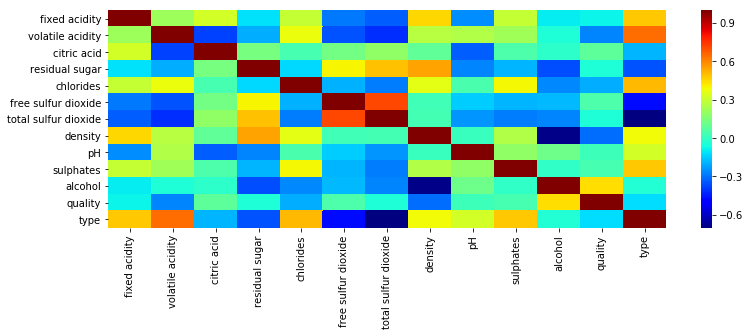

In [19]:
# correlation matrix
corr = wines.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap='jet'
)

In [34]:
# prepare dataset
x = wines.iloc[:,0:11]
y = np.ravel(wines.type)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
# Standardize
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.output_shape

(None, 1)

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 11),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 12,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_re

In [43]:
model.get_weights()

[array([[-0.24926382, -0.47849268, -0.05805722, -0.36524552, -0.21776927,
          0.19838369, -0.35797626, -0.43813971, -0.22449115, -0.12881196,
          0.07525659,  0.34048122],
        [ 0.09286755,  0.29395694, -0.31964582,  0.40854502,  0.4875952 ,
         -0.35963297, -0.22200355, -0.12670857, -0.27867219, -0.50890625,
         -0.28869778, -0.41467875],
        [ 0.18365496,  0.03230608, -0.45991227,  0.47871858,  0.27380079,
          0.26932752,  0.4960205 ,  0.40465182,  0.0783143 , -0.12097514,
          0.15841031,  0.4093771 ],
        [ 0.42006516, -0.21759379, -0.19757524,  0.44753814, -0.14679956,
          0.30898011,  0.29870194, -0.31031847, -0.24270013, -0.42046908,
          0.05579245,  0.42576313],
        [ 0.29229581, -0.03892872, -0.4534232 , -0.08116952,  0.29177582,
         -0.11583897,  0.19064087, -0.4878065 , -0.19135141, -0.3852095 ,
          0.32502323,  0.17545915],
        [ 0.13602859,  0.23243076, -0.02299237, -0.36588484,  0.45581579,
      

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 4s 936us/step - loss: 0.0883 - acc: 0.9795
Epoch 2/20
4352/4352 [==============================] - 4s 887us/step - loss: 0.0275 - acc: 0.9947
Epoch 3/20
4352/4352 [==============================] - 4s 866us/step - loss: 0.0223 - acc: 0.9954
Epoch 4/20
4352/4352 [==============================] - 4s 873us/step - loss: 0.0201 - acc: 0.9966
Epoch 5/20
4352/4352 [==============================] - 4s 897us/step - loss: 0.0178 - acc: 0.9966
Epoch 6/20
4352/4352 [==============================] - 4s 879us/step - loss: 0.0180 - acc: 0.9968
Epoch 7/20
4352/4352 [==============================] - 4s 873us/step - loss: 0.0152 - acc: 0.9975
Epoch 8/20
4352/4352 [==============================] - 4s 877us/step - loss: 0.0149 - acc: 0.9970
Epoch 9/20
4352/4352 [==============================] - 4s 875us/step - loss: 0.0142 - acc: 0.9975
Epoch 10/20
4352/4352 [==============================] - 4s 896us/step - loss: 0.0129 - acc: 0.9972
Epoch 11/

In [45]:
y_pred = model.predict(x_test)

In [48]:
model.evaluate(x_test, y_test,verbose=1)

2145/2145 [==============================] - 0s 27us/step


[0.023313372967839904, 0.99580419580419577]

In [51]:
confusion_matrix(y_test, y_pred > .5)

array([[1586,    2],
       [   7,  550]])

# Predicting Wine Quality

In [54]:
y = wines.quality
x = wines.drop('quality', axis=1)
x = StandardScaler().fit_transform(x)

In [56]:
x.shape

(6497, 12)

In [61]:
seed=7
np.random.seed(seed)
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(x, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(x[train], y[train], epochs=10, verbose=0)
    mse_value, mae_value = model.evaluate(x[test], y[test], verbose=0)
    print(mse_value)

0.490103229262
0.534729243058
0.552901178461
0.557662764022
0.486291381356


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, epochs=10, verbose=0)

In [80]:
y_pred = model.predict(x_test)
mse_value, mae_value = model.evaluate(x_test, y_test, verbose=0)
print(mse_value, mae_value)

0.52997985542 0.567072369058


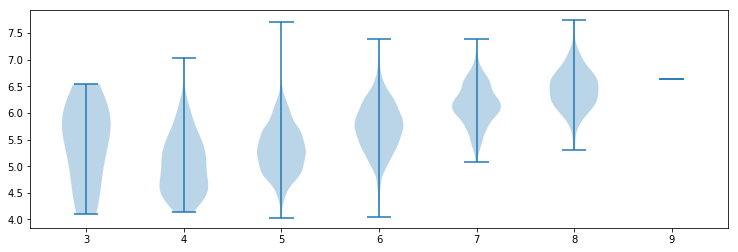

In [81]:
pos = range(3, 10)
data = [y_pred[y_test == i] for i in pos]
_ = plt.violinplot(data, pos)